### Ejemplo de experimentación verificando la complejidad temporal

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

fig = plt.figure()
df = pd.read_csv("runtime_random.csv")

<Figure size 640x480 with 0 Axes>

### Ajusto las complejidades por la complejidad teórica

######  1. Implementación N cuadrado

La curva que mejor se ajusta es: 35.357*N^2


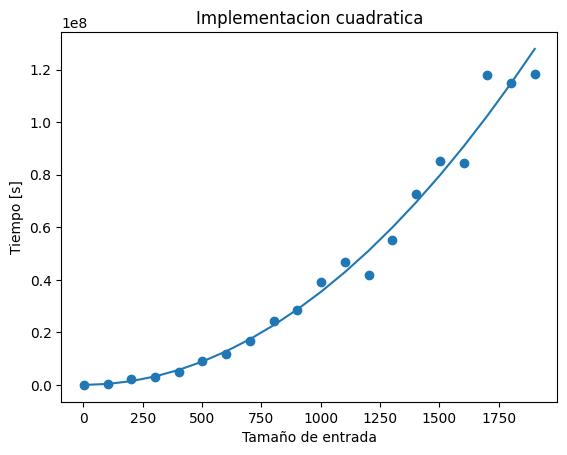

In [19]:
def n_cuadrado(x, a):
    return a * (x**2)

popt, pcov = curve_fit(n_cuadrado, df["n"], df["n^2"])
[a] = popt

plt.scatter(df["n"], df["n^2"])
plt.plot(df["n"], n_cuadrado(df["n"],a))
plt.title("Implementacion cuadratica")
plt.xlabel("Tamaño de entrada")
plt.ylabel("Tiempo [s]")
print(f"La curva que mejor se ajusta es: {round(a,3)}*N^2")

###### 2. Implementación con PC

La curva que mejor se ajusta es: 118.917*N^2*log(N)


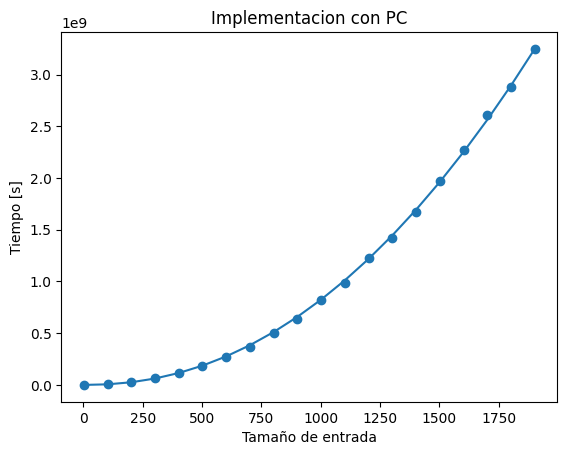

In [20]:
#Esto es la complejidad teórica cuando se hace sort
def mlogn_ajustado(x, a):
    return a * (x**2)*np.log(x)

popt, pcov = curve_fit(mlogn_ajustado, df["n"], df["PC"])
[a_PC] = popt

plt.scatter(df["n"], df["PC"])
plt.plot(df["n"], mlogn_ajustado(df["n"], a_PC))
plt.title("Implementacion con PC")
plt.xlabel("Tamaño de entrada")
plt.ylabel("Tiempo [s]")
print(f"La curva que mejor se ajusta es: {round(a_PC,3)}*N^2*log(N)")

###### 3. Implementacion sin PC

La curva que mejor se ajusta es: 117.175*N^2*log(N)


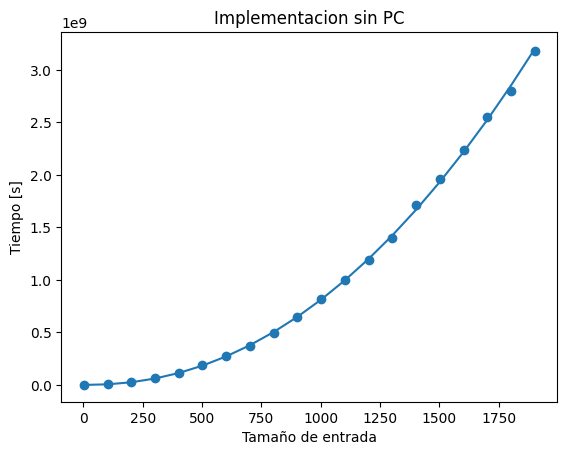

In [21]:
def mlogn_ajustado(x, a):
    return a * (x**2)*np.log(x)

popt, pcov = curve_fit(mlogn_ajustado, df["n"], df["SPC"])
[a_SPC] = popt

plt.scatter(df["n"], df["SPC"])
plt.plot(df["n"], mlogn_ajustado(df["n"], a_SPC))
plt.title("Implementacion sin PC")
plt.xlabel("Tamaño de entrada")
plt.ylabel("Tiempo [s]")
print(f"La curva que mejor se ajusta es: {round(a_SPC,3)}*N^2*log(N)")

La curva que mejor se ajusta es: 0.519*N^3


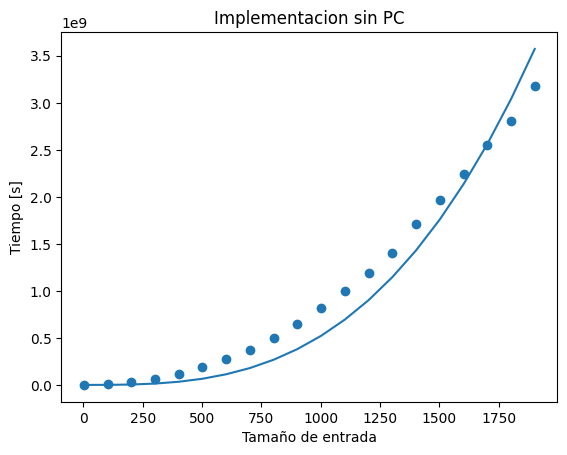

In [22]:
def n_cubo(x, a):
    return a * (x**3)

popt, pcov = curve_fit(n_cubo, df["n"], df["SPC"])
[a_SPC] = popt

plt.scatter(df["n"], df["SPC"])
plt.plot(df["n"], n_cubo(df["n"], a_SPC))
plt.title("Implementacion sin PC")
plt.xlabel("Tamaño de entrada")
plt.ylabel("Tiempo [s]")
print(f"La curva que mejor se ajusta es: {round(a_SPC,3)}*N^3")

Text(0, 0.5, 'Tiempo [s]')

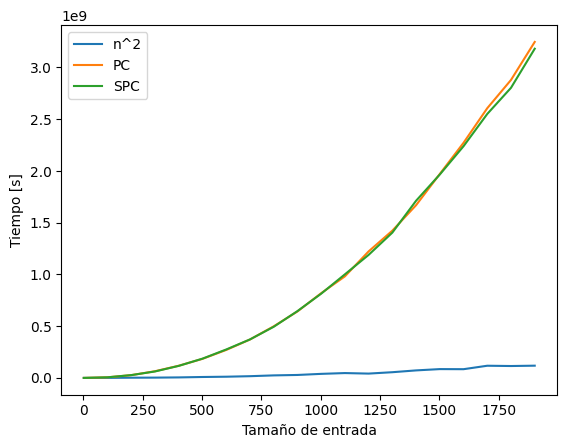

In [23]:
df.plot(x="n")
plt.xlabel("Tamaño de entrada")
plt.ylabel("Tiempo [s]")